In [1]:
using LinearAlgebra
using DifferentialEquations
using FFTW

using BenchmarkTools

using Plots 

Delta t for m1 = m2 kg: 0.43478260869565216
Delta t for m1 = m2 kg: 0.2702702702702703
Delta t for m1 = m2 kg: 0.11627906976744186


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase ~/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


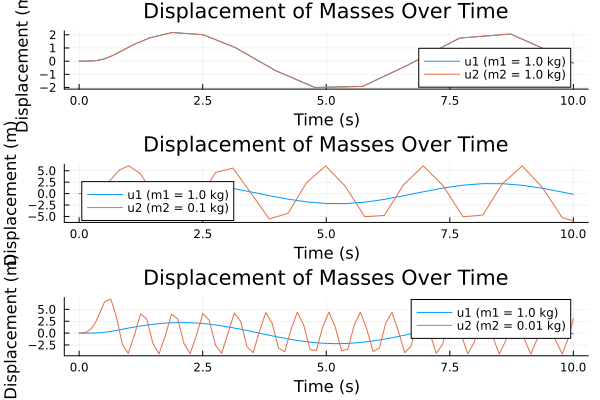

In [41]:
# Define the external force functions and ODE system
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

F_external2(t) = 0.0

function system!(du, u, p, t)
    m1, m2, k1, k2, k3, γ1, γ2, γ3, t0, F0, sigma = p
    x1, v1, x2, v2 = u

    du[1] = v1
    du[2] = (gaussian_pulse(t, t0, F0, sigma) - γ1*v1 - γ2*(v1 - v2) - k1*x1 - k2*(x1 - x2)) / m1
    du[3] = v2
    # du[4] = (F_external2(t) - γ3*v2 - γ2*(v2 - v1) - k3*x2 - k2*(x2 - x1)) / m2
    du[4] = (gaussian_pulse(t, t0, F0, sigma) - γ3*v2 - γ2*(v2 - v1) - k3*x2 - k2*(x2 - x1)) / m2
end

# Simulate and plot for different masses, and calculate delta t
function simulate_mass_system(mass_cases)
    k1 = 1
    k3 = 1 
    k2 = 0 # 1500.0
    γ1 = 0    # 20.0
    γ2 = 0    # 25.0
    γ3 = 0    # 30.0
    t0 = 0.5  # 5.0
    F0 = 5
    sigma = 0.18
    tspan = (0.0, 10.0)
    u0 = [0.0, 0.0, 0.0, 0.0]

    plots = []
    for (m1, m2) in mass_cases
        p = [m1, m2, k1, k2, k3, γ1, γ2, γ3, t0, F0, sigma]
        prob = ODEProblem(system!, u0, tspan, p)
        sol = solve(prob,Vern7(), abstol = 1e-6)  
        # sol = solve(prob,DPRKN6(), abstol=1e-6, reltol=1e-6)
        # sol = solve(prob,Tsit5(), atol=1e-6, rtol=1e-6)
        # plt = bar((sol.t[2:end] - sol.t[1:end-1])) 
        plt = plot(sol.t, sol[1, :], label="u1 (m1 = $m1 kg)", xlabel="Time (s)", ylabel="Displacement (m)")
        plot!(plt, sol.t, sol[3, :], label="u2 (m2 = $m2 kg)")
        push!(plots, plt)
        
        # Calculate delta t for each solution
        delta_ts = diff(sol.t)
        println("Delta t for m1 = m2 kg: ", mean(delta_ts))
    end
    plot(plots..., layout = (length(mass_cases), 1), title="Displacement of Masses Over Time")
end

# Define mass cases for simulation
mass_cases = [(1.0, 1.0), (1.0, 0.1), (1.0,0.01)]

# Call the simulation function
simulate_mass_system(mass_cases)

In [36]:
# solve

In [44]:
?complex

search: complex Complex ComplexF64 ComplexF32 ComplexF16 precompile



```
complex(r, [i])
```

Convert real numbers or arrays to complex. `i` defaults to zero.

# Examples

```jldoctest
julia> complex(7)
7 + 0im

julia> complex([1, 2, 3])
3-element Vector{Complex{Int64}}:
 1 + 0im
 2 + 0im
 3 + 0im
```

---

```
complex(T::Type)
```

Return an appropriate type which can represent a value of type `T` as a complex number. Equivalent to `typeof(complex(zero(T)))`.

# Examples

```jldoctest
julia> complex(Complex{Int})
Complex{Int64}

julia> complex(Int)
Complex{Int64}
```


In [45]:
z = 1+2*im 

1 + 2im

In [46]:
real(z)

1

In [47]:
imag(z)

2

In [52]:
plot(real(z), imag(z), (0.5, [:cross :hex :star7], 12))

LoadError: Cannot convert Float64 to series data for plotting